Lais Ferreira dos Santos
Tamiris Rodrigues Duarte



A Report Submitted in Partial Fulfilment 
of the requirements for the 
Degree of 
BSc in Computing in IT (4th year)




May 2024



Supervisor: Dr. Muhammad Iqbal


In [1]:
# Importing the necassary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import math
from sklearn.tree import export_graphviz
import pydot
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

*---------DATA CLEANING AND PREPARATION----------*

In [2]:
# Reading the dataset
dataset = pd.read_csv("co2emission.csv")
dataset.head()

country  year iso_code  population  gdp  cement_co2  \
0  Afghanistan  1850      AFG   3752993.0  NaN         NaN   
1  Afghanistan  1851      AFG   3767956.0  NaN         NaN   
2  Afghanistan  1852      AFG   3783940.0  NaN         NaN   
3  Afghanistan  1853      AFG   3800954.0  NaN         NaN   
4  Afghanistan  1854      AFG   3818038.0  NaN         NaN   

   cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  \
0                    NaN  NaN             NaN              NaN  ...   
1                    NaN  NaN             NaN              NaN  ...   
2                    NaN  NaN             NaN              NaN  ...   
3                    NaN  NaN             NaN              NaN  ...   
4                    NaN  NaN             NaN              NaN  ...   

   share_global_other_co2  share_of_temperature_change_from_ghg  \
0                     NaN                                   NaN   
1                     NaN                                 0.165   
2                     NaN                                 0.164   
3                     NaN                                 0.164   
4                     NaN                                 0.163   

   temperature_change_from_ch4  temperature_change_from_co2  \
0                          NaN                          NaN   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   temperature_change_from_ghg  temperature_change_from_n2o  total_ghg  \
0                          NaN                          NaN        NaN   
1                          0.0                          0.0        NaN   
2                          0.0                          0.0        NaN   
3                          0.0                          0.0        NaN   
4                          0.0                          0.0        NaN   

   total_ghg_excluding_lucf  trade_co2  trade_co2_share  
0                       NaN        NaN              NaN  
1                       NaN        NaN              NaN  
2                       NaN        NaN              NaN  
3                       NaN        NaN              NaN  
4                       NaN        NaN              NaN  

[5 rows x 79 columns]

In [3]:
# Getting the dimensions
dataset.shape

(50598, 79)

In [4]:
# Selecting specific columns from the dataset
new_data = dataset[["country", "year", "co2_per_capita"]]

new_data.tail()

country  year  co2_per_capita
50593  Zimbabwe  2017           0.651
50594  Zimbabwe  2018           0.784
50595  Zimbabwe  2019           0.724
50596  Zimbabwe  2020           0.677
50597  Zimbabwe  2021           0.706

In [5]:
# Selecting the countries within Europe
europe = new_data[new_data["country"].isin(["Albania","Austria","Andorra","Armenia","Azerbaijan",
                                            "Belarus","Belgium","Bosnia and Herzegovina","Bulgaria",
                                            "Croatia","Cyprus","Czechia",
                                            "Denmark",
                                            "Estonia",
                                            "Finland","France",
                                            "Georgia","Germany","Greece",
                                            "Hungary",
                                            "Iceland","Ireland","Italy",
                                            "Kazakhstan","Kosovo",
                                            "Latvia","Liechtenstein","Lithuania","Luxembourg",
                                            "Malta","Moldova","Montenegro",
                                            "Netherlands","North Macedonia","Norway",
                                            "Poland","Portugal",
                                            "Romania","Russia",
                                            "Serbia","Slovakia","Spain","Sweden","Switzerland",
                                           "Turkey",
                                           "Ukraine", "United Kingdom"])]
europe.head()

country  year  co2_per_capita
788  Albania  1850             NaN
789  Albania  1851             NaN
790  Albania  1852             NaN
791  Albania  1853             NaN
792  Albania  1854             NaN

In [6]:
# Filterig the dataframe
europe_data = europe.loc[(europe["year"] >= 1900)]
europe_data

country  year  co2_per_capita
838           Albania  1900             NaN
839           Albania  1901             NaN
840           Albania  1902             NaN
841           Albania  1903             NaN
842           Albania  1904             NaN
...               ...   ...             ...
47932  United Kingdom  2017           5.863
47933  United Kingdom  2018           5.716
47934  United Kingdom  2019           5.462
47935  United Kingdom  2020           4.865
47936  United Kingdom  2021           5.154

[5734 rows x 3 columns]

In [7]:
# Checking mssing values
print(europe_data.isnull())
missing_counts = europe_data.isnull().sum()
print(missing_counts)

       country   year  co2_per_capita
838      False  False            True
839      False  False            True
840      False  False            True
841      False  False            True
842      False  False            True
...        ...    ...             ...
47932    False  False           False
47933    False  False           False
47934    False  False           False
47935    False  False           False
47936    False  False           False

[5734 rows x 3 columns]
country             0
year                0
co2_per_capita    426
dtype: int64


In [8]:
# Printing summary
europe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8708 entries, 788 to 47936
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         8708 non-null   object 
 1   year            8708 non-null   int64  
 2   co2_per_capita  7380 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 272.1+ KB


In [9]:
# Grouping dataframe by country
grouped = europe_data.groupby(['country'])
#Calculating the mean values for each group
mean_values = grouped.mean()
# Filling missing values with the mean
europe_data.loc[:,'co2_per_capita'] = grouped['co2_per_capita'].transform(lambda x: x.fillna(x.mean()))
europe_data

country  year  co2_per_capita
838           Albania  1900        1.232888
839           Albania  1901        1.232888
840           Albania  1902        1.232888
841           Albania  1903        1.232888
842           Albania  1904        1.232888
...               ...   ...             ...
47932  United Kingdom  2017        5.863000
47933  United Kingdom  2018        5.716000
47934  United Kingdom  2019        5.462000
47935  United Kingdom  2020        4.865000
47936  United Kingdom  2021        5.154000

[5734 rows x 3 columns]

In [10]:
# Grouping by 'year' and calculate the mean of 'co2_per_capita' within each year group
mean_by_year = europe_data.groupby('year')['co2_per_capita'].mean()

mean_by_year.head(10)

year
1900    2.395832
1901    2.375619
1902    2.365278
1903    2.400300
1904    2.419300
1905    2.426151
1906    2.514151
1907    2.627321
1908    2.707172
1909    2.663959
Name: co2_per_capita, dtype: float64

In [11]:
# Converting Series to DataFrame
df = mean_by_year.reset_index()

# Display the DataFrame
df

year  co2_per_capita
0    1900        2.395832
1    1901        2.375619
2    1902        2.365278
3    1903        2.400300
4    1904        2.419300
..    ...             ...
117  2017        6.501851
118  2018        6.448809
119  2019        6.175596
120  2020        5.677936
121  2021        5.756660

[122 rows x 2 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            122 non-null    int64  
 1   co2_per_capita  122 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.0 KB


In [13]:
# Converting 'year' column to datetime format without considering it as a timestamp
df['year'] = pd.to_datetime(df['year'], format='%Y')

print(df)
print(df.dtypes)

          year  co2_per_capita
0   1900-01-01        2.395832
1   1901-01-01        2.375619
2   1902-01-01        2.365278
3   1903-01-01        2.400300
4   1904-01-01        2.419300
..         ...             ...
117 2017-01-01        6.501851
118 2018-01-01        6.448809
119 2019-01-01        6.175596
120 2020-01-01        5.677936
121 2021-01-01        5.756660

[122 rows x 2 columns]
year              datetime64[ns]
co2_per_capita           float64
dtype: object


In [14]:
# Calculating IQR for column 'co2_per_capita'
Q1 = df['co2_per_capita'].quantile(0.25)
Q3 = df['co2_per_capita'].quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers
threshold = 1.5
outliers = df[(df['co2_per_capita'] < Q1 - threshold * IQR) | (df['co2_per_capita'] > Q3 + threshold * IQR)]
print(outliers)


Empty DataFrame
Columns: [year, co2_per_capita]
Index: []


*----------CALCULATING PARAMETERS----------*

In [15]:
# Importing modules
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

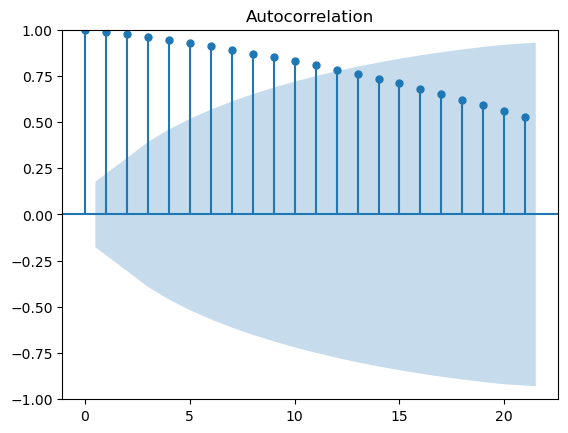

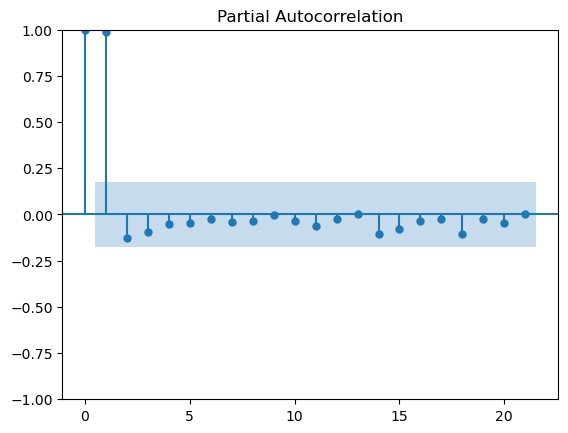

In [16]:
# Plotting ACF
acf_original = plot_acf((df['co2_per_capita']))
# Plotting PACF
pacf_original = plot_pacf((df['co2_per_capita']))

In [17]:
import statsmodels.api as sm

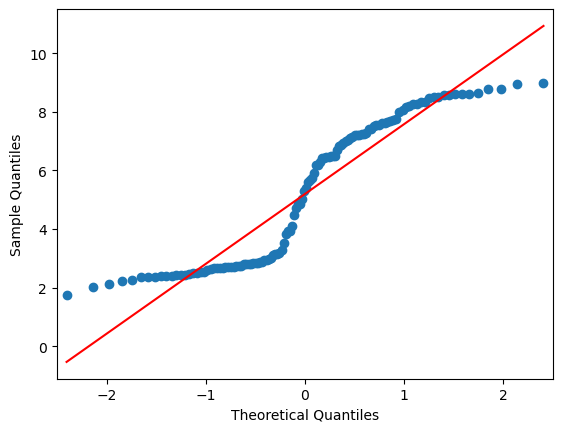

In [18]:
# Creating a Q_Q plot for the co2_per_capita_column
x = sm.qqplot(df['co2_per_capita'], line = 's')

In [19]:
# Performing the Augmented Dickey_fuller (ADF)
adftest = adfuller(df['co2_per_capita'])
print("ADF Test Results")
print("Null Hypothesis: The series has a unit root (non-stationary)")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values:", adftest[4])
print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")

ADF Test Results
Null Hypothesis: The series has a unit root (non-stationary)
ADF-Statistic: -1.1838322326020234
P-Value: 0.680511724082201
Number of lags: 1
Number of observations: 120
Critical Values: {'1%': -3.486055829282407, '5%': -2.8859430324074076, '10%': -2.5797850694444446}
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary


In [20]:
# Importing ARIMA class
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [21]:
# Automatically selects the best ARIMA model
stepwise_fit = auto_arima(df['co2_per_capita'], trace = True,
                         suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-15.347, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-11.202, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-17.991, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-16.320, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-11.407, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-17.301, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-18.447, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-17.316, Time=0.37 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-17.241, Time=0.40 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-16.132, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-20.100, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-17.019, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-18.949, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-19.161, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-19.0

In [22]:
# A nested loop is written to calculate the AIC values
# The lowest AIC the better

aic_values=[]
for d in range(0,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(df['co2_per_capita'], order=(ari,d,maj))
                arima_obj_fit = arima_obj.fit()
                aic_values.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
print(aic_values)

[[0, 0, 0, 562.4703268416656], [0, 0, 1, 412.59735871315297], [0, 0, 2, 294.84797259976744], [1, 0, 0, -3.6224074584299686], [1, 0, 1, -9.31018275543472], [1, 0, 2, -9.425985832748779], [2, 0, 0, -11.327132836982074], [2, 0, 1, -16.000370760513054], [2, 0, 2, -16.68535109248187], [0, 1, 0, -11.407116814033158], [0, 1, 1, -17.01855697648189], [0, 1, 2, -17.061730746043274], [1, 1, 0, -18.949477465863918], [1, 1, 1, -20.100000189567357], [1, 1, 2, -19.080918533634875], [2, 1, 0, -18.50468642417404], [2, 1, 1, -19.16081959265658], [2, 1, 2, -17.19444192838876], [0, 2, 0, 33.98112121683988], [0, 2, 1, -16.822927324755028], [0, 2, 2, -16.58741047615775], [1, 2, 0, 10.719914321615752], [1, 2, 1, -16.729951968758222], [1, 2, 2, -14.814095276190965], [2, 2, 0, 2.8059454275459483], [2, 2, 1, -14.81369222909511], [2, 2, 2, -12.84113511540037]]


In [23]:
# Storing one difference value of the 'co2 per capita' column
diffval = df['co2_per_capita'].diff(1)
# Dropping the first row of 'co2 per capita' column because It has 'NaN' value
diffval = df['co2_per_capita'].diff(1).dropna()


# Displaying the first five records
diffval.head()

1   -0.020213
2   -0.010340
3    0.035021
4    0.019000
5    0.006851
Name: co2_per_capita, dtype: float64

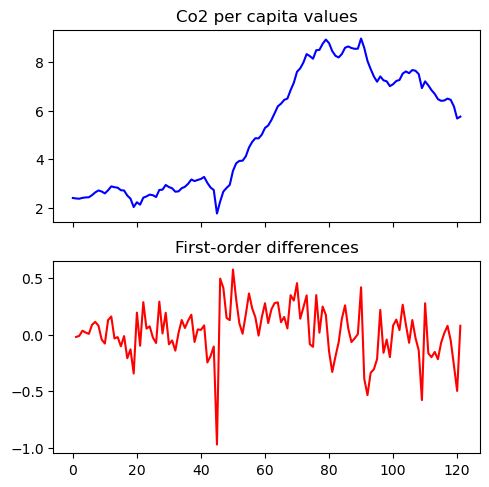

In [24]:
# Declaring the fig abd ax as two arguments 
fig, ax = plt.subplots(2, sharex = True)
fig.set_size_inches(5.5, 5.5)
df['co2_per_capita'].plot(ax = ax[0], color = 'b')
ax[0].set_title('Co2 per capita values')
diffval.plot(ax = ax[1], color = 'r')
ax[1].set_title('First-order differences');

*----------TESTING ARIMA MODELS----------*

In [25]:
# Fitting the model
model = ARIMA(df['co2_per_capita'].tolist(), order = (1, 1, 1))

model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  122
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  13.050
Date:                Mon, 20 May 2024   AIC                            -20.100
Time:                        20:14:21   BIC                            -11.713
Sample:                             0   HQIC                           -16.694
                                - 122                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8537      0.128      6.687      0.000       0.603       1.104
ma.L1         -0.6816      0.149     -4.567      0.000      -0.974      -0.389
sigma2         0.0471      0.004     11.879      0.000       0.039       0.055
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                46.22
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               3.15   Skew:                            -0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
# Declaring the array 'pred' and append the values 
pred = model_fit.fittedvalues

# Adding a new column 'ARIMA' into dataframe
df['ARIMA'] = pred

df.head(10)


year  co2_per_capita     ARIMA
0 1900-01-01        2.395832  0.000000
1 1901-01-01        2.375619  2.395832
2 1902-01-01        2.365278  2.370785
3 1903-01-01        2.400300  2.360041
4 1904-01-01        2.419300  2.403302
5 1905-01-01        2.426151  2.424715
6 1906-01-01        2.514151  2.431025
7 1907-01-01        2.627321  2.532726
8 1908-01-01        2.707172  2.659513
9 1909-01-01        2.663959  2.742867

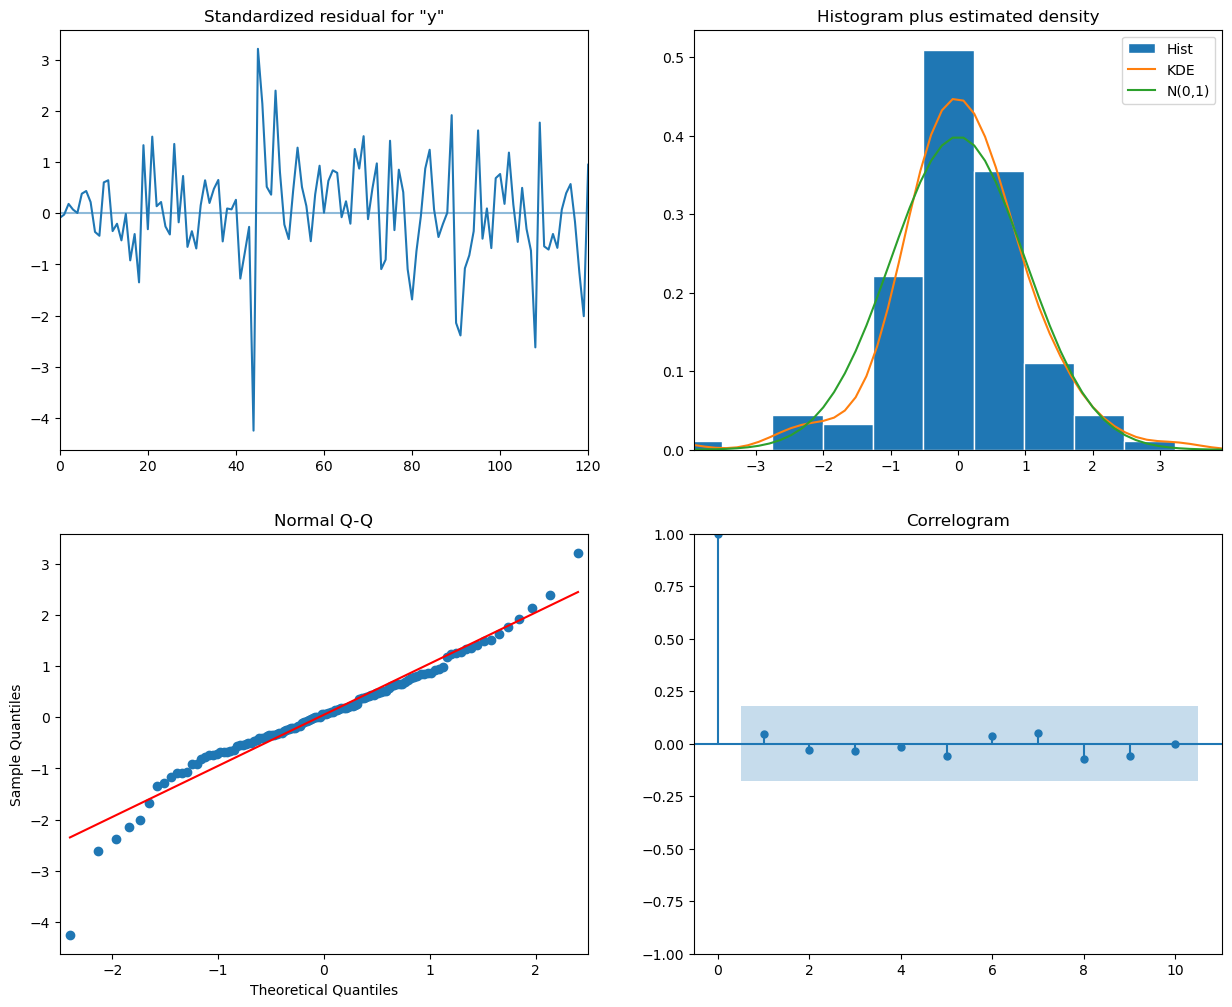

In [27]:
# Diagnosing the model residuals
model_fit.plot_diagnostics(figsize = (15, 12))
plt.show()

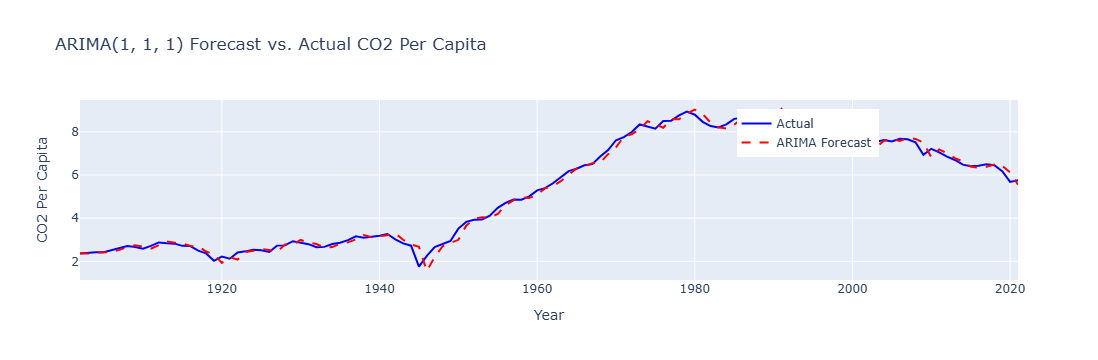

In [28]:
import plotly.graph_objs as go
# Set the index of the DataFrame to the 'Year' column
df.set_index('year', inplace=True)


# Create traces for actual and ARIMA forecast values
trace_actual = go.Scatter(x=df.index[2:], y=df['co2_per_capita'].iloc[2:], mode='lines', name='Actual', line=dict(color='blue'))
trace_arima = go.Scatter(x=df.index[2:], y=df['ARIMA'].iloc[2:], mode='lines', name='ARIMA Forecast', line=dict(color='red', dash='dash'))

# Create layout
layout = go.Layout(title='ARIMA(1, 1, 1) Forecast vs. Actual CO2 Per Capita',
                   xaxis=dict(title='Year'),
                   yaxis=dict(title='CO2 Per Capita'),
                   legend=dict(x=0.7, y=0.95))

# Combine traces and layout
fig = go.Figure(data=[trace_actual, trace_arima], layout=layout)

# Show plot
fig.show()


In [29]:
# Split the data into train and test
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:len(df)]

In [30]:
# Another parameter selection
order_aic_bic = sm.tsa.arma_order_select_ic(train["co2_per_capita"].dropna(), ic=["aic", "bic"])
print(f"ARIMA Order (AIC): {order_aic_bic['aic_min_order']}")
print(f"ARIMA Order (BIC): {order_aic_bic['bic_min_order']}")

ARIMA Order (AIC): (2, 2)
ARIMA Order (BIC): (2, 1)


In [31]:
# Fit the the first ARIMA model on the training dataset
model_train_1 = ARIMA(train['co2_per_capita'], order=(1,1, 1))
model_train_fit_1 = model_train_1.fit()
model_train_fit_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         co2_per_capita   No. Observations:                   97
Model:                 ARIMA(1, 1, 1)   Log Likelihood                   9.331
Date:                Mon, 20 May 2024   AIC                            -12.662
Time:                        20:14:28   BIC                             -4.969
Sample:                    01-01-1900   HQIC                            -9.552
                         - 01-01-1996                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7422      0.179      4.146      0.000       0.391       1.093
ma.L1         -0.5027      0.208     -2.417      0.016      -0.910      -0.095
sigma2         0.0481      0.004     10.827      0.000       0.039       0.057
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                56.69
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               2.85   Skew:                            -0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
# Forecast on the test dataset from the first model
test_forecast_1 = model_train_fit_1.get_forecast(steps=len(test))
test_forecast_series_1 = pd.Series(test_forecast_1.predicted_mean, index=test.index)
test_forecast_series_1

year
1997-01-01    7.405289
1998-01-01    7.396415
1999-01-01    7.389828
2000-01-01    7.384940
2001-01-01    7.381311
2002-01-01    7.378618
2003-01-01    7.376620
2004-01-01    7.375136
2005-01-01    7.374035
2006-01-01    7.373218
2007-01-01    7.372612
2008-01-01    7.372161
2009-01-01    7.371827
2010-01-01    7.371579
2011-01-01    7.371395
2012-01-01    7.371259
2013-01-01    7.371157
2014-01-01    7.371082
2015-01-01    7.371026
2016-01-01    7.370985
2017-01-01    7.370954
2018-01-01    7.370931
2019-01-01    7.370914
2020-01-01    7.370902
2021-01-01    7.370892
Name: predicted_mean, dtype: float64

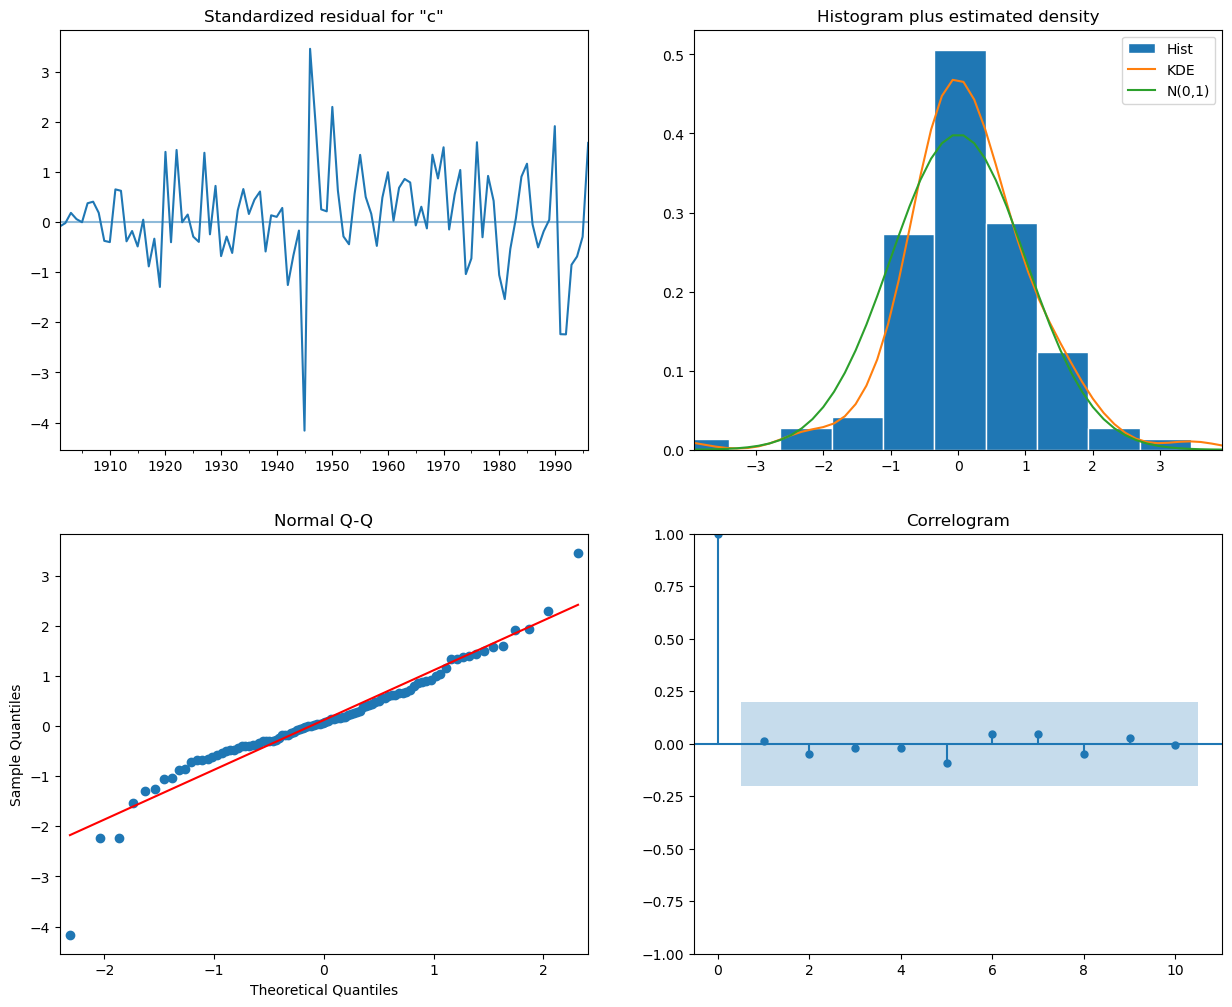

In [33]:
# Diagnosing the model residuals
model_train_fit_1.plot_diagnostics(figsize = (15, 12))
plt.show()

In [34]:

# Calculate the mean squared error
mse_1 = mean_squared_error(test['co2_per_capita'], test_forecast_series_1)
# Print RMSE
print('Test MSE: %.3f' % mse_1)

# Calculate the mean absolute error
mae_1 = mean_absolute_error(test['co2_per_capita'], test_forecast_series_1)
# Print MAE
print('Test MAE: %.3f' % mae_1)

# Calculate the mean absolute error
rmse_1 = math.sqrt(mean_squared_error(test['co2_per_capita'], test_forecast_series_1))
# Print MAE
print('Test RMSE: %.3f' % rmse_1)

# Calculate the mean absolute error
mape_1 = np.mean(np.abs(test_forecast_series_1 - test['co2_per_capita'])/np.abs(test['co2_per_capita']))
# Print MAE
print('Test MAPE: %.3f' % mape_1)


Test MSE: 0.512
Test MAE: 0.551
Test RMSE: 0.716
Test MAPE: 0.086


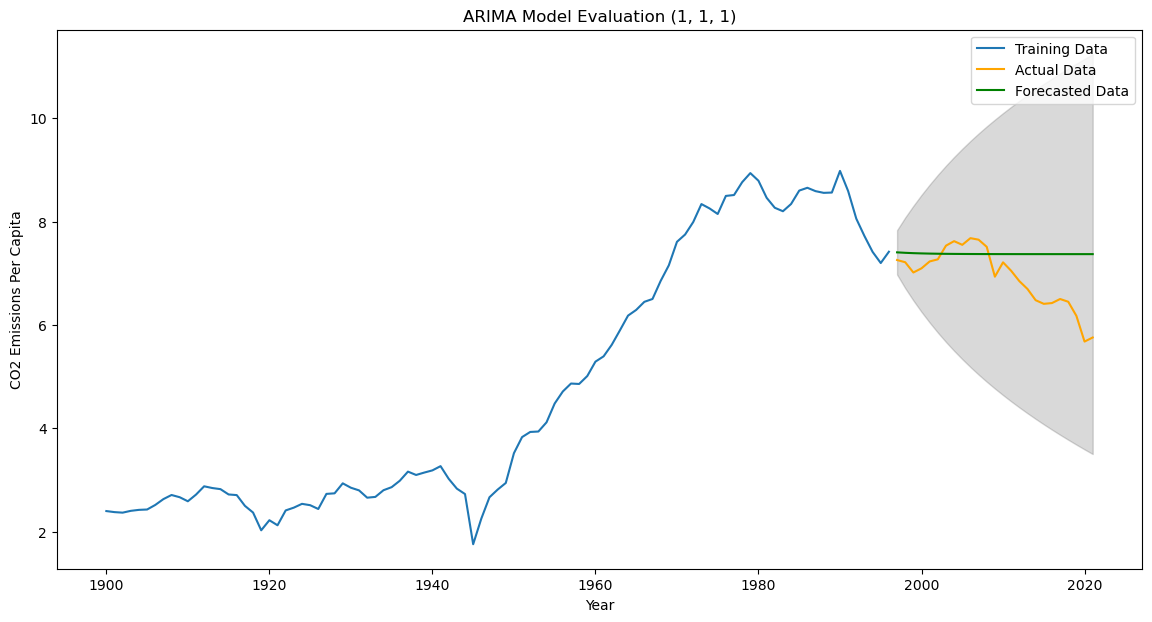

In [35]:
# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['co2_per_capita'], label='Training Data')
plt.plot(test['co2_per_capita'], label='Actual Data', color='orange')
plt.plot(test_forecast_series_1, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast_1.conf_int().iloc[:, 0], 
                 test_forecast_1.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation (1, 1, 1)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions Per Capita')
plt.legend()
plt.show()


In [36]:
# Fit the ARIMA model on the training dataset
model_train_2 = ARIMA(train['co2_per_capita'], order=(2,2, 0))
model_train_fit_2 = model_train_2.fit()
model_train_fit_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         co2_per_capita   No. Observations:                   97
Model:                 ARIMA(2, 2, 0)   Log Likelihood                   0.564
Date:                Mon, 20 May 2024   AIC                              4.872
Time:                        20:14:31   BIC                             12.534
Sample:                    01-01-1900   HQIC                             7.968
                         - 01-01-1996                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5241      0.079     -6.624      0.000      -0.679      -0.369
ar.L2         -0.2760      0.138     -1.999      0.046      -0.547      -0.005
sigma2         0.0576      0.007      8.384      0.000       0.044       0.071
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                55.55
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):               2.45   Skew:                             0.50
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
# Forecast on the test dataset
test_forecast_2 = model_train_fit_2.get_forecast(steps=len(test))
test_forecast_series_2 = pd.Series(test_forecast_2.predicted_mean, index=test.index)
test_forecast_series_2

year
1997-01-01    7.383242
1998-01-01    7.361747
1999-01-01    7.403449
2000-01-01    7.408579
2001-01-01    7.415435
2002-01-01    7.431479
2003-01-01    7.442231
2004-01-01    7.453221
2005-01-01    7.465547
2006-01-01    7.477107
2007-01-01    7.488700
2008-01-01    7.500487
2009-01-01    7.512163
2010-01-01    7.523844
2011-01-01    7.535553
2012-01-01    7.547246
2013-01-01    7.558939
2014-01-01    7.570637
2015-01-01    7.582332
2016-01-01    7.594027
2017-01-01    7.605723
2018-01-01    7.617419
2019-01-01    7.629114
2020-01-01    7.640810
2021-01-01    7.652506
Name: predicted_mean, dtype: float64

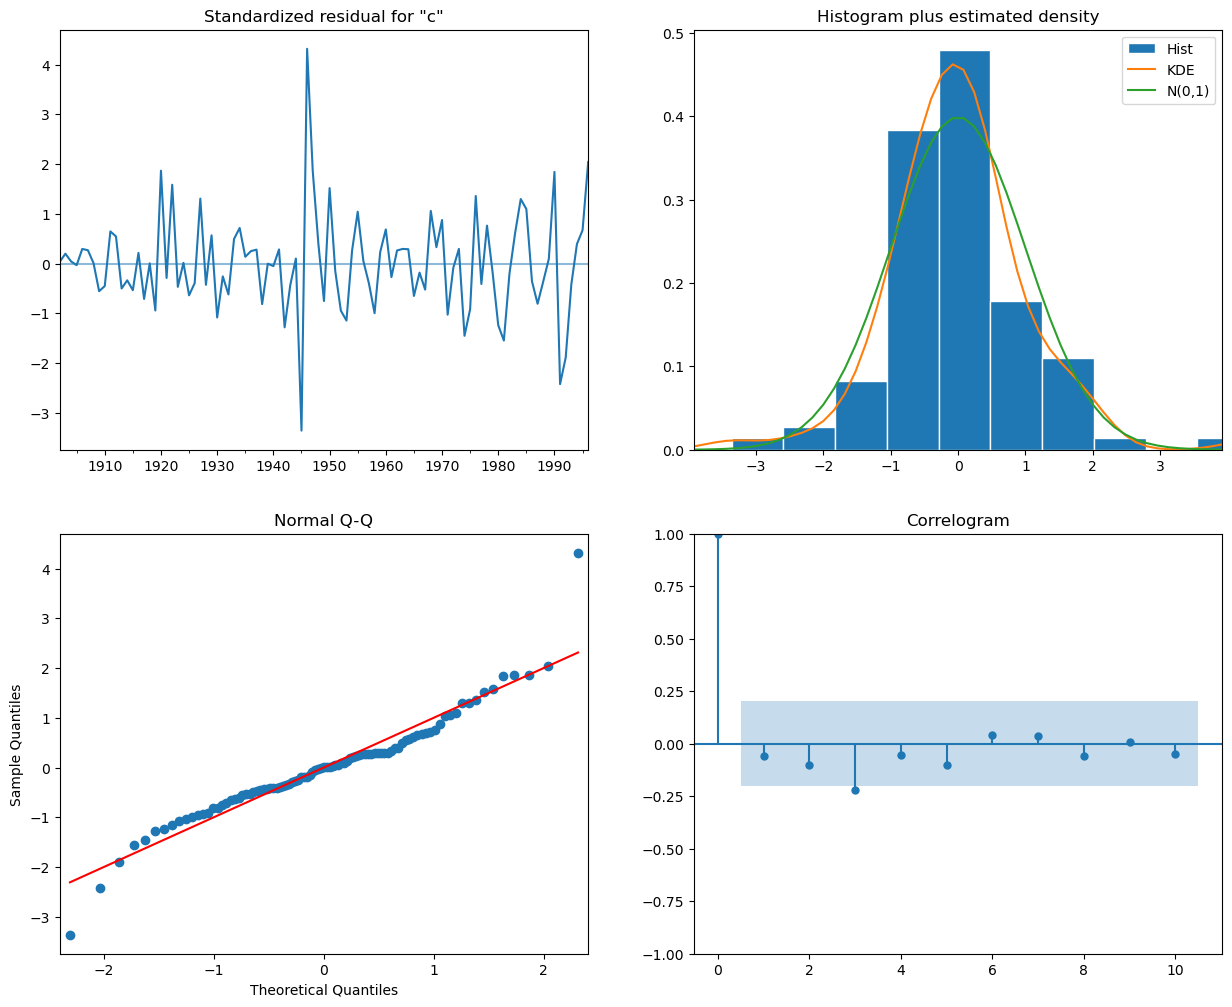

In [38]:
# Diagnosing the model residuals
model_train_fit_2.plot_diagnostics(figsize = (15, 12))
plt.show()

In [39]:
# Calculate the mean squared error
mse_2 = mean_squared_error(test['co2_per_capita'], test_forecast_series_2)
# Print RMSE
print('Test MSE: %.3f' % mse_2)

# Calculate the mean absolute error
mae_2 = mean_absolute_error(test['co2_per_capita'], test_forecast_series_2)
# Print MAE
print('Test MAE: %.3f' % mae_2)

# Calculate the mean absolute error
rmse_2 = math.sqrt(mean_squared_error(test['co2_per_capita'], test_forecast_series_2))
# Print MAE
print('Test RMSE: %.3f' % rmse_2)

# Calculate the mean absolute error
mape_2 = np.mean(np.abs(test_forecast_series_2 - test['co2_per_capita'])/np.abs(test['co2_per_capita']))
# Print MAE
print('Test MAPE: %.3f' % mape_2)


Test MSE: 0.738
Test MAE: 0.640
Test RMSE: 0.859
Test MAPE: 0.100


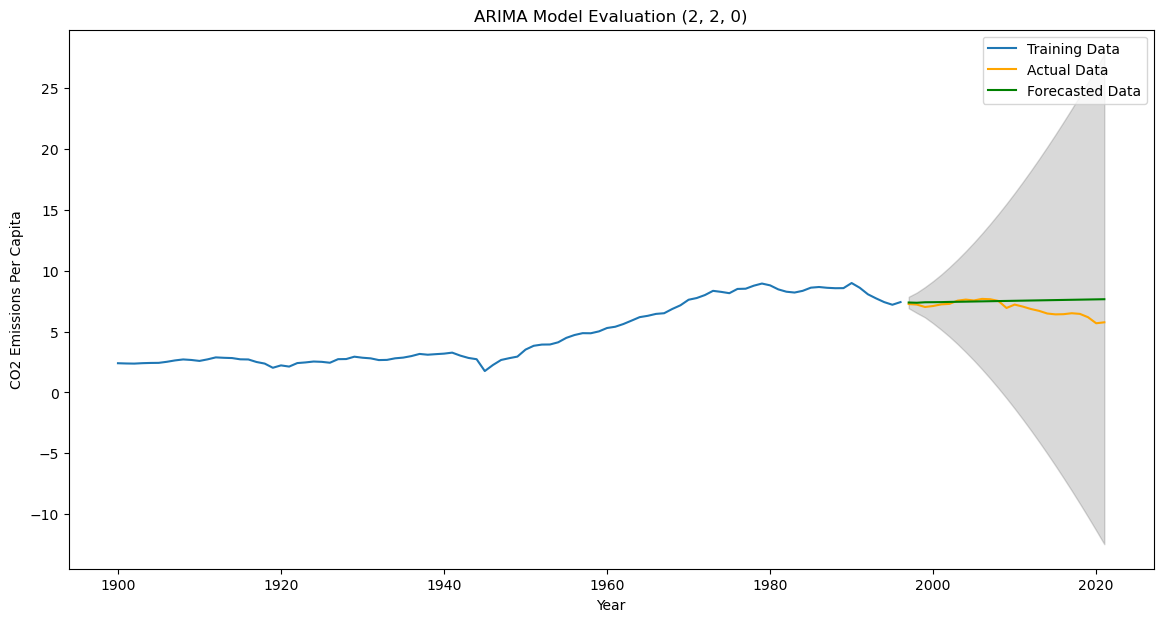

In [40]:
# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['co2_per_capita'], label='Training Data')
plt.plot(test['co2_per_capita'], label='Actual Data', color='orange')
plt.plot(test_forecast_series_2, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast_2.conf_int().iloc[:, 0], 
                 test_forecast_2.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation (2, 2, 0)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions Per Capita')
plt.legend()
plt.show()


*----------COMPARING THE MODELS----------*

In [41]:
# Adding the other two models to the dataframe
pred_1 = model_train_fit_1.fittedvalues
pred_2 = model_train_fit_2.fittedvalues

# Adding a new column 'ARIMA' into dataframe
df['ARIMA 1 1 1'] = pred_1

# Add a column 'diffval' into dataframe
df['ARIMA 2 2 0'] = pred_2

# Display first five records
df.head(10).dropna()


co2_per_capita     ARIMA  ARIMA 1 1 1  ARIMA 2 2 0
year                                                          
1900-01-01        2.395832  0.000000     0.000000     0.000000
1901-01-01        2.375619  2.395832     2.395832     3.593748
1902-01-01        2.365278  2.370785     2.369628     2.355406
1903-01-01        2.400300  2.360041     2.359730     2.350883
1904-01-01        2.419300  2.403302     2.406039     2.408824
1905-01-01        2.426151  2.424715     2.426747     2.434177
1906-01-01        2.514151  2.431025     2.431535     2.443790
1907-01-01        2.627321  2.532726     2.537935     2.562976
1908-01-01        2.707172  2.659513     2.666380     2.704905
1909-01-01        2.663959  2.742867     2.745930     2.797538

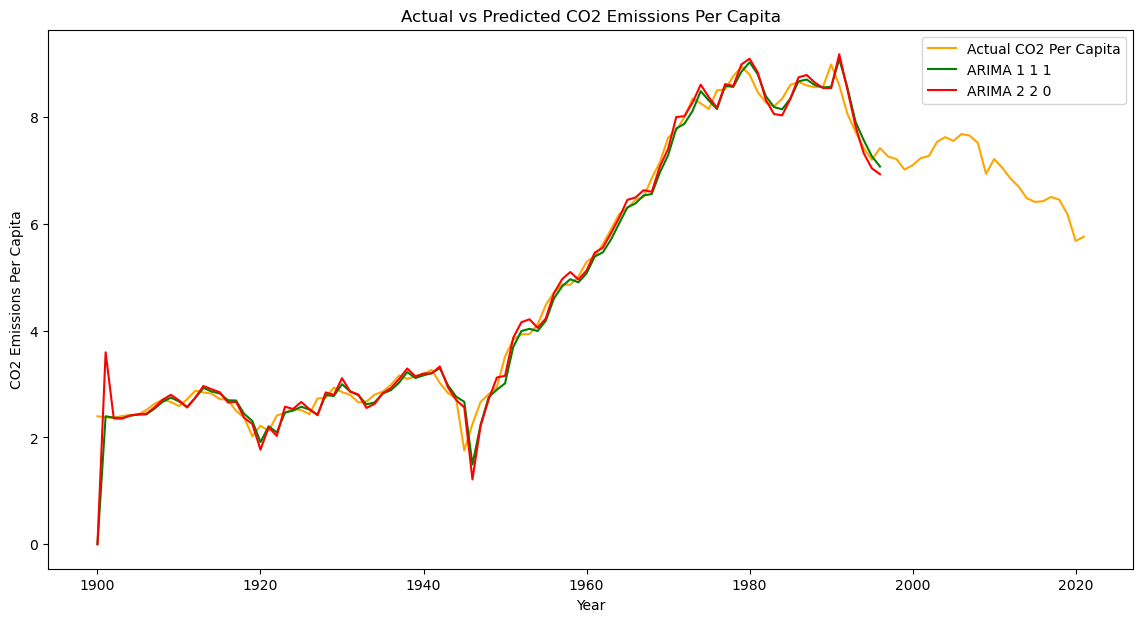

In [42]:
### # Plotting the DataFrame
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['co2_per_capita'], label='Actual CO2 Per Capita', color='orange')
plt.plot(df.index, df['ARIMA 1 1 1'], label='ARIMA 1 1 1', color='green')
plt.plot(df.index, df['ARIMA 2 2 0'], label='ARIMA 2 2 0', color='red')

# Add title and labels
plt.title('Actual vs Predicted CO2 Emissions Per Capita')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions Per Capita')
plt.legend()

# Display the plot
plt.show()


*----------FORECASTING 50 YEARS----------*

In [43]:
years_steps = 50
future_dates = model_fit.get_forecast(steps = years_steps)
forecast = future_dates.predicted_mean

In [44]:
forecast_df = pd.DataFrame({'Forecast': forecast})

In [45]:
forecast_df

Forecast
0   5.683351
1   5.620771
2   5.567349
3   5.521745
4   5.482814
5   5.449581
6   5.421212
7   5.396994
8   5.376320
9   5.358672
10  5.343607
11  5.330746
12  5.319767
13  5.310395
14  5.302395
15  5.295565
16  5.289735
17  5.284758
18  5.280509
19  5.276883
20  5.273787
21  5.271144
22  5.268887
23  5.266961
24  5.265317
25  5.263914
26  5.262715
27  5.261693
28  5.260820
29  5.260074
30  5.259438
31  5.258895
32  5.258431
33  5.258035
34  5.257697
35  5.257409
36  5.257163
37  5.256952
38  5.256773
39  5.256620
40  5.256489
41  5.256378
42  5.256282
43  5.256201
44  5.256131
45  5.256072
46  5.256022
47  5.255978
48  5.255941
49  5.255910

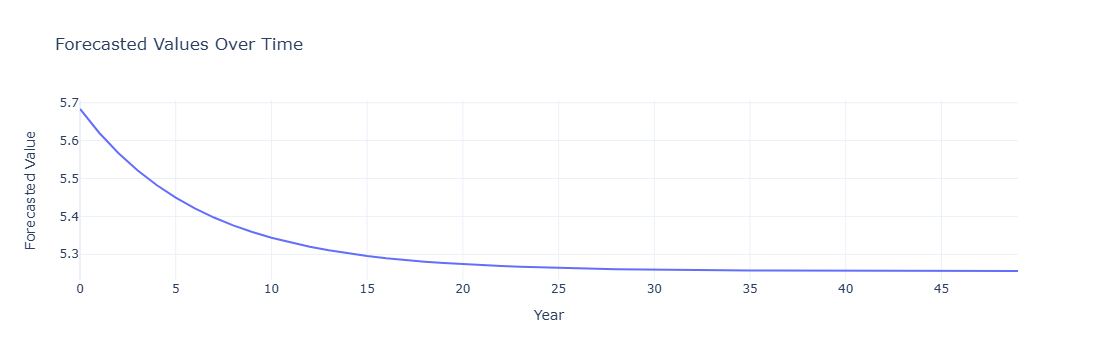

In [46]:
import plotly.express as px

# Convert the index to a column if it's not already
forecast_df = forecast_df.reset_index()

# Rename the columns to 'Year' and 'Forecasted Value' if they are not named accordingly
forecast_df.columns = ['Year', 'Forecasted Value']

# Create an interactive line plot
fig = px.line(forecast_df, x='Year', y='Forecasted Value', title='Forecasted Values Over Time')

# Customize the layout
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Forecasted Value',
    template='plotly_white',
    hovermode='x'
)

# Show the plot
fig.show()


*----------RANDOM FOREST----------*

In [47]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [48]:
dataset_2 = pd.read_csv("co2emission.csv")
dataset_2.head()

country  year iso_code  population  gdp  cement_co2  \
0  Afghanistan  1850      AFG   3752993.0  NaN         NaN   
1  Afghanistan  1851      AFG   3767956.0  NaN         NaN   
2  Afghanistan  1852      AFG   3783940.0  NaN         NaN   
3  Afghanistan  1853      AFG   3800954.0  NaN         NaN   
4  Afghanistan  1854      AFG   3818038.0  NaN         NaN   

   cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  \
0                    NaN  NaN             NaN              NaN  ...   
1                    NaN  NaN             NaN              NaN  ...   
2                    NaN  NaN             NaN              NaN  ...   
3                    NaN  NaN             NaN              NaN  ...   
4                    NaN  NaN             NaN              NaN  ...   

   share_global_other_co2  share_of_temperature_change_from_ghg  \
0                     NaN                                   NaN   
1                     NaN                                 0.165   
2                     NaN                                 0.164   
3                     NaN                                 0.164   
4                     NaN                                 0.163   

   temperature_change_from_ch4  temperature_change_from_co2  \
0                          NaN                          NaN   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   temperature_change_from_ghg  temperature_change_from_n2o  total_ghg  \
0                          NaN                          NaN        NaN   
1                          0.0                          0.0        NaN   
2                          0.0                          0.0        NaN   
3                          0.0                          0.0        NaN   
4                          0.0                          0.0        NaN   

   total_ghg_excluding_lucf  trade_co2  trade_co2_share  
0                       NaN        NaN              NaN  
1                       NaN        NaN              NaN  
2                       NaN        NaN              NaN  
3                       NaN        NaN              NaN  
4                       NaN        NaN              NaN  

[5 rows x 79 columns]

In [49]:
europe = dataset_2[dataset_2["country"].isin(["Albania","Austria","Andorra","Armenia","Azerbaijan",
                                            "Belarus","Belgium","Bosnia and Herzegovina","Bulgaria",
                                            "Croatia","Cyprus","Czechia",
                                            "Denmark",
                                            "Estonia",
                                            "Finland","France",
                                            "Georgia","Germany","Greece",
                                            "Hungary",
                                            "Iceland","Ireland","Italy",
                                            "Kazakhstan","Kosovo",
                                            "Latvia","Liechtenstein","Lithuania","Luxembourg",
                                            "Malta","Moldova","Montenegro",
                                            "Netherlands","North Macedonia","Norway",
                                            "Poland","Portugal",
                                            "Romania","Russia",
                                            "Serbia","Slovakia","Spain","Sweden","Switzerland",
                                           "Turkey",
                                           "Ukraine", "United Kingdom"])]
europe.head()

country  year iso_code  population  gdp  cement_co2  \
788  Albania  1850      ALB    501490.0  NaN         NaN   
789  Albania  1851      ALB    505313.0  NaN         NaN   
790  Albania  1852      ALB    509659.0  NaN         NaN   
791  Albania  1853      ALB    514536.0  NaN         NaN   
792  Albania  1854      ALB    519460.0  NaN         NaN   

     cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  \
788                    NaN  NaN             NaN              NaN  ...   
789                    NaN  NaN             NaN              NaN  ...   
790                    NaN  NaN             NaN              NaN  ...   
791                    NaN  NaN             NaN              NaN  ...   
792                    NaN  NaN             NaN              NaN  ...   

     share_global_other_co2  share_of_temperature_change_from_ghg  \
788                     NaN                                   NaN   
789                     NaN                                 0.034   
790                     NaN                                 0.034   
791                     NaN                                 0.034   
792                     NaN                                 0.034   

     temperature_change_from_ch4  temperature_change_from_co2  \
788                          NaN                          NaN   
789                          0.0                          0.0   
790                          0.0                          0.0   
791                          0.0                          0.0   
792                          0.0                          0.0   

     temperature_change_from_ghg  temperature_change_from_n2o  total_ghg  \
788                          NaN                          NaN        NaN   
789                          0.0                          0.0        NaN   
790                          0.0                          0.0        NaN   
791                          0.0                          0.0        NaN   
792                          0.0                          0.0        NaN   

     total_ghg_excluding_lucf  trade_co2  trade_co2_share  
788                       NaN        NaN              NaN  
789                       NaN        NaN              NaN  
790                       NaN        NaN              NaN  
791                       NaN        NaN              NaN  
792                       NaN        NaN              NaN  

[5 rows x 79 columns]

In [50]:
europe_data = europe.loc[(europe["year"] >= 1900)]
europe_data

country  year iso_code  population           gdp  cement_co2  \
838           Albania  1900      ALB    805974.0  8.736000e+08         NaN   
839           Albania  1901      ALB    813539.0           NaN         NaN   
840           Albania  1902      ALB    821036.0           NaN         NaN   
841           Albania  1903      ALB    828461.0           NaN         NaN   
842           Albania  1904      ALB    835954.0           NaN         NaN   
...               ...   ...      ...         ...           ...         ...   
47932  United Kingdom  2017      GBR  66064808.0  2.506604e+12       4.410   
47933  United Kingdom  2018      GBR  66432996.0  2.540210e+12       4.364   
47934  United Kingdom  2019      GBR  66778660.0           NaN       4.448   
47935  United Kingdom  2020      GBR  67059472.0           NaN       3.900   
47936  United Kingdom  2021      GBR  67281040.0           NaN       3.900   

       cement_co2_per_capita      co2  co2_growth_abs  co2_growth_prct  ...  \
838                      NaN      NaN             NaN              NaN  ...   
839                      NaN      NaN             NaN              NaN  ...   
840                      NaN      NaN             NaN              NaN  ...   
841                      NaN      NaN             NaN              NaN  ...   
842                      NaN      NaN             NaN              NaN  ...   
...                      ...      ...             ...              ...  ...   
47932                  0.067  387.367         -12.063           -3.020  ...   
47933                  0.066  379.730          -7.637           -1.972  ...   
47934                  0.067  364.753         -14.976           -3.944  ...   
47935                  0.058  326.263         -38.490          -10.552  ...   
47936                  0.058  346.773          20.510            6.286  ...   

       share_global_other_co2  share_of_temperature_change_from_ghg  \
838                       NaN                                 0.033   
839                       NaN                                 0.033   
840                       NaN                                 0.033   
841                       NaN                                 0.033   
842                       NaN                                 0.032   
...                       ...                                   ...   
47932                   0.986                                 2.556   
47933                   1.004                                 2.518   
47934                   1.041                                 2.481   
47935                   0.915                                 2.446   
47936                   0.924                                 2.411   

       temperature_change_from_ch4  temperature_change_from_co2  \
838                          0.000                        0.000   
839                          0.000                        0.000   
840                          0.000                        0.000   
841                          0.000                        0.000   
842                          0.000                        0.000   
...                            ...                          ...   
47932                        0.004                        0.033   
47933                        0.003                        0.034   
47934                        0.003                        0.034   
47935                        0.003                        0.034   
47936                        0.003                        0.034   

       temperature_change_from_ghg  temperature_change_from_n2o  total_ghg  \
838                          0.000                        0.000        NaN   
839                          0.000                        0.000        NaN   
840                          0.000                        0.000        NaN   
841                          0.000                        0.000        NaN   
842                          0.000                        0.000        NaN   
..

In [51]:
new_data = europe_data[["country", "year", "population", "gdp", "cement_co2", "coal_co2", "co2_per_capita"]]

new_data.tail()

country  year  population           gdp  cement_co2  coal_co2  \
47932  United Kingdom  2017  66064808.0  2.506604e+12       4.410    39.129   
47933  United Kingdom  2018  66432996.0  2.540210e+12       4.364    33.280   
47934  United Kingdom  2019  66778660.0           NaN       4.448    24.513   
47935  United Kingdom  2020  67059472.0           NaN       3.900    22.809   
47936  United Kingdom  2021  67281040.0           NaN       3.900    23.690   

       co2_per_capita  
47932           5.863  
47933           5.716  
47934           5.462  
47935           4.865  
47936           5.154

In [52]:
# Group by 'year' and calculate the mean of 'co2_per_capita' within each year group
random_forest = europe_data.groupby('year')[['population','coal_co2', 'gdp', 'cement_co2', 'co2_per_capita']].mean().dropna()

# Display the first 10 means per year
random_forest.head(10)

population   coal_co2           gdp  cement_co2  co2_per_capita
year                                                                   
1900  9.321342e+06  30.957868  6.271860e+10    0.000000        1.527100
1901  9.400948e+06  30.596579  7.314710e+10    0.000000        1.503350
1902  9.482077e+06  30.635474  7.435997e+10    0.000000        1.491200
1903  9.564770e+06  31.969789  7.567910e+10    0.000000        1.532350
1904  9.648308e+06  32.547263  7.713213e+10    0.000000        1.554675
1905  9.732702e+06  33.679921  7.894920e+10    0.000000        1.562725
1906  9.817939e+06  34.707263  8.155835e+10    0.000000        1.666125
1907  9.904094e+06  38.473000  8.405628e+10    0.000000        1.799100
1908  9.991112e+06  39.038026  8.390934e+10    0.015857        1.892925
1909  1.006564e+07  39.007711  8.603009e+10    0.015714        1.842150

In [53]:
print(random_forest.isnull())

      population  coal_co2    gdp  cement_co2  co2_per_capita
year                                                         
1900       False     False  False       False           False
1901       False     False  False       False           False
1902       False     False  False       False           False
1903       False     False  False       False           False
1904       False     False  False       False           False
...          ...       ...    ...         ...             ...
2014       False     False  False       False           False
2015       False     False  False       False           False
2016       False     False  False       False           False
2017       False     False  False       False           False
2018       False     False  False       False           False

[119 rows x 5 columns]


In [54]:
import numpy as np
# Labels are the values we want to predict
labels = np.array(random_forest['co2_per_capita'])
# Remove the labels from the features
# axis 1 refers to the columns
random_forest= random_forest.drop('co2_per_capita', axis = 1)
# Saving feature names for later use
feature_list = list(random_forest.columns)
# Convert to numpy array
random_forest = np.array(random_forest)

In [55]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(random_forest, labels, test_size = 0.25, random_state = 42)

In [56]:
random_forest.shape

(119, 4)

In [57]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (89, 4)
Training Labels Shape: (89,)
Testing Features Shape: (30, 4)
Testing Labels Shape: (30,)


In [58]:
# Calculate the mean of the target variable
baseline_prediction = np.mean(test_features)

# Create an array of baseline predictions with the same length as the test set
baseline_predictions = np.full_like(test_features, fill_value=baseline_prediction)

#baseline_mse = mean_squared_error(test_features, baseline_predictions)
baseline_mae = mean_absolute_error(test_features, baseline_predictions)

# Print the rounded baseline MAE
print("Baseline MAE:", baseline_mae)

Baseline MAE: 80588458537.99704


In [59]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [60]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.15


In [61]:
print("Length of train_features:", len(train_features))
print("Length of train_labels:", len(train_labels))

Length of train_features: 89
Length of train_labels: 89


In [62]:
predictions

array([4.53453996, 8.7569568 , 1.54835971, 1.75634219, 1.60799329,
       6.67171502, 7.36891355, 1.70798241, 8.62900046, 8.21663022,
       1.84914043, 6.95333449, 1.90783994, 7.42911695, 2.61838746,
       1.98687833, 8.76069483, 1.4321052 , 7.41655434, 6.98667628,
       6.26653711, 2.28240677, 7.56374065, 3.82329805, 2.12060181,
       1.92984815, 1.86266552, 8.05199056, 7.66828383, 1.77296664])

In [63]:
print('Predictions: ',predictions, 'Test Features: ', test_features) 

Predictions:  [4.53453996 8.7569568  1.54835971 1.75634219 1.60799329 6.67171502
 7.36891355 1.70798241 8.62900046 8.21663022 1.84914043 6.95333449
 1.90783994 7.42911695 2.61838746 1.98687833 8.76069483 1.4321052
 7.41655434 6.98667628 6.26653711 2.28240677 7.56374065 3.82329805
 2.12060181 1.92984815 1.86266552 8.05199056 7.66828383 1.77296664] Test Features:  [[1.32432131e+07 6.42957500e+01 1.07119271e+11 1.30517778e+00]
 [1.71026067e+07 7.84361136e+01 3.20359984e+11 3.85935556e+00]
 [9.64830841e+06 3.25472632e+01 7.71321305e+10 0.00000000e+00]
 [1.23690765e+07 2.77320952e+01 9.43402418e+10 1.77930233e-01]
 [1.08850771e+07 3.23508718e+01 8.28687559e+10 2.93750000e-02]
 [1.83033281e+07 4.03235106e+01 5.87935376e+11 3.26561702e+00]
 [1.51205818e+07 6.99560909e+01 2.26205371e+11 3.26424444e+00]
 [1.01276363e+07 3.85182564e+01 7.09788845e+10 1.60000000e-02]
 [1.71814507e+07 7.02238043e+01 3.19930686e+11 3.60660870e+00]
 [1.55667538e+07 6.84273864e+01 2.25674497e+11 3.89866667e+00]
 [1.0

In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.21 %.


In [66]:
# Pull out one tree from the forest
tree = rf.estimators_[5]

In [67]:
# Pull out one tree from the forest
tree = rf.estimators_[5]

In [68]:
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

In [69]:
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [70]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [71]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: cement_co2           Importance: 0.42
Variable: population           Importance: 0.33
Variable: gdp                  Importance: 0.23
Variable: coal_co2             Importance: 0.01


Variable: cement_co2           Importance: 0.42
Variable: population           Importance: 0.33
Variable: gdp                  Importance: 0.23
Variable: coal_co2             Importance: 0.01


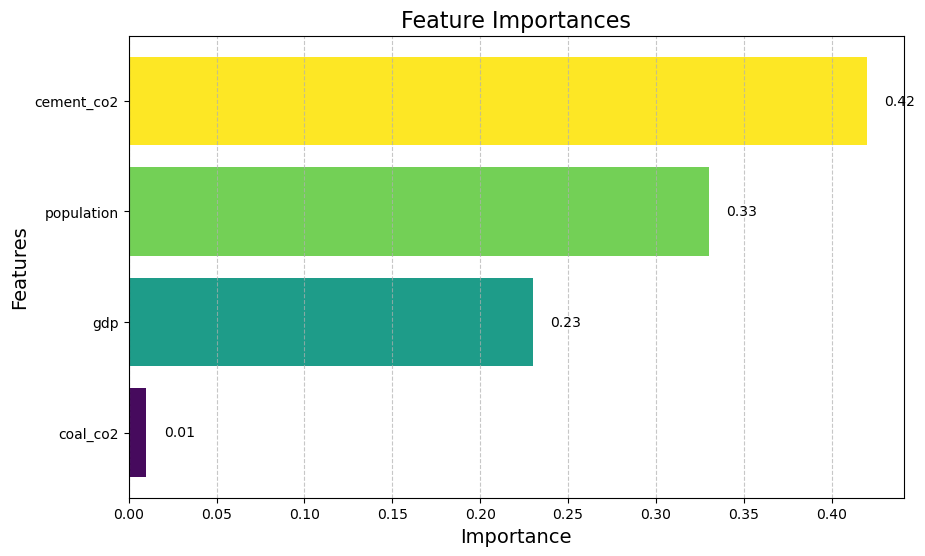

In [72]:
# Get feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance, rounded to 2 decimal places
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

# Extract the sorted features and their importance values
features, importances = zip(*feature_importances)

# Plot the feature importances
plt.figure(figsize=(10, 6))

# Create color gradient
colors = plt.cm.viridis(np.array(importances) / max(importances))

# Plot horizontal bar chart
bars = plt.barh(features, importances, color=colors)

# Add value labels to the bars
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center', ha='left', fontsize=10)

plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importances', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


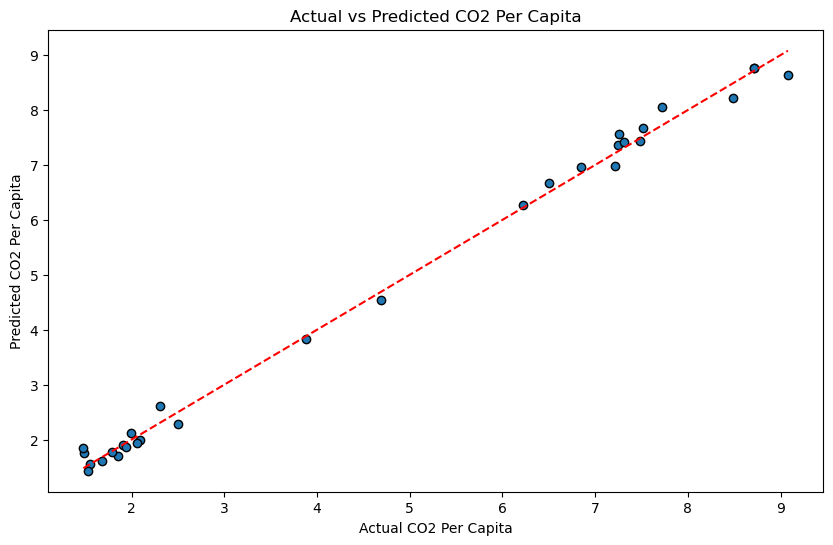

In [73]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(test_labels, predictions, edgecolors=(0, 0, 0))
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], 'r--')
plt.xlabel('Actual CO2 Per Capita')
plt.ylabel('Predicted CO2 Per Capita')
plt.title('Actual vs Predicted CO2 Per Capita')
plt.show()